# Step 1: Plot a Straight Line

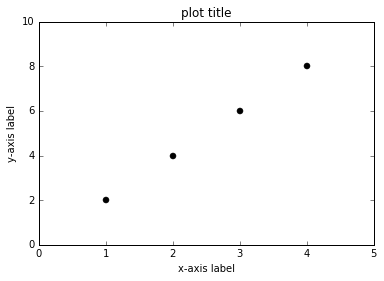

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

x=[1.0,2.0,3.0,4.0]
y=[2.0,4.0,6.0,8.0]

plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"ko")

# Step 2: Formatting Plots

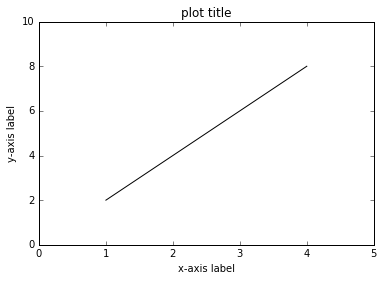

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

x=[1.0,2.0,3.0,4.0]
y=[2.0,4.0,6.0,8.0]

plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"k")

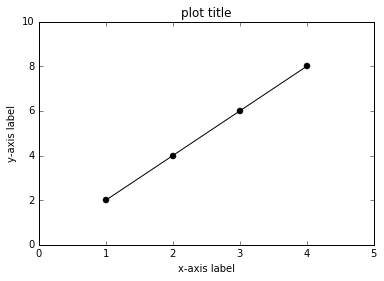

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

x=[1.0,2.0,3.0,4.0]
y=[2.0,4.0,6.0,8.0]

plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"ko")
plt.plot(x,y,"k")

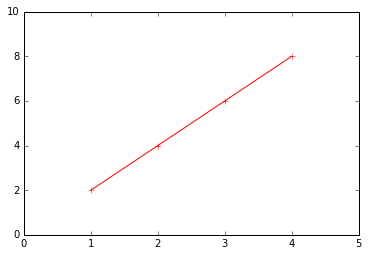

In [4]:
plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"r")
plt.plot(x,y,"r+")

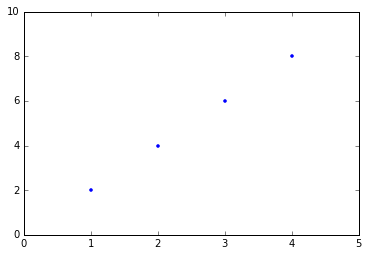

In [5]:
plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"b.")

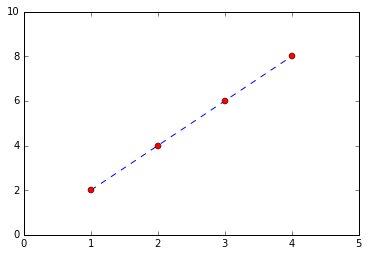

In [6]:
plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"b--")
plt.plot(x,y,"ro")

# Step 3: Labeling Plots

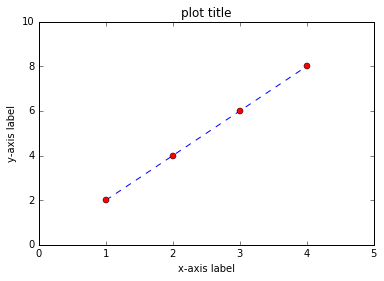

In [7]:
plt.xlabel("x-axis label")
plt.ylabel("y-axis label")
plt.title("plot title")

plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"b--")
plt.plot(x,y,"ro")

# plt.savefig("my_plot.png")

# Step 4: Introduction to Lists

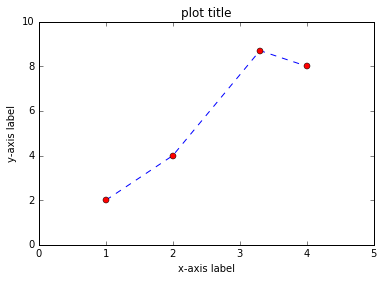

In [8]:
x[2]=3.3
y[2]=8.7
plt.xlim(0.0,5.0)
plt.ylim(0.0,10.0)
plt.plot(x,y,"b--")
plt.plot(x,y,"ro")

plt.xlabel("x-axis label")
plt.ylabel("y-axis label")
plt.title("plot title")

# Step 5: List Comprehensions

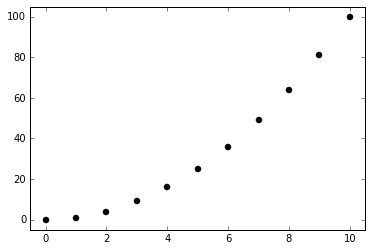

In [11]:
x2 = range(11)
y2 = [ x**2 for x in x2 ]
plt.xlim(-0.5,10.5)
plt.ylim(-5,105)
plt.plot(x2,y2,"ko")

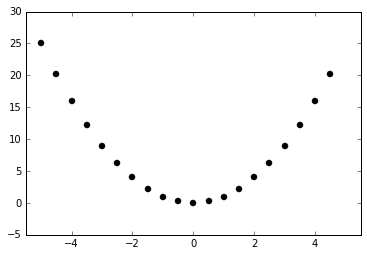

In [17]:
import numpy as np
x3 = np.arange(-5.0,5.0,0.5)
y3 = [ x**2 for x in x3 ]
plt.xlim(-5.5,5.5)
plt.ylim(-5,30)
plt.plot(x3,y3,"ko")

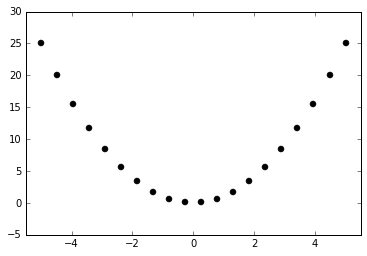

In [18]:
x4 = np.linspace(-5.0,5.0,20)
y4 = [ x**2 for x in x4 ]
plt.xlim(-5.5,5.5)
plt.ylim(-5,30)
plt.plot(x4,y4,"ko")

# Step 6: First-Order Kinetics

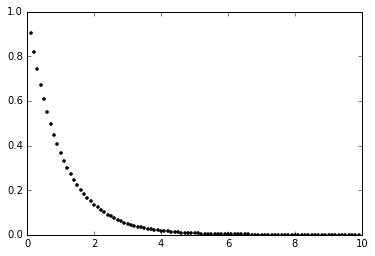

In [19]:
from math import exp
import numpy as np

time = np.arange(0.0,10.0,0.1)
initial_concentration = 1.0
rate_constant = 1.0
concentration = [ initial_concentration * exp(-rate_constant*t) for t in time ]
plt.plot(time, concentration, "k.")

# Step 7: Make a Log Plot

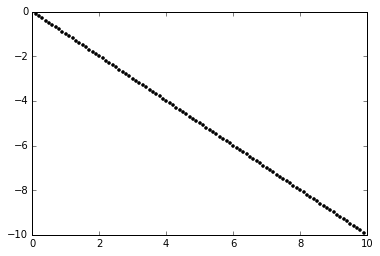

In [20]:
from math import log

log_concentration = [ log(conc) for conc in concentration ]
plt.plot(time, log_concentration, "k.")

# Step 8: Fit a Straight Line

In [26]:
from scipy.optimize import curve_fit

def f(x, m, b):
    return m*x + b

popt, pcov = curve_fit(f, time, log_concentration)
slope = popt[0]
intercept = popt[1]

print "popt: ", popt
print "pcov: ", pcov
print
print "slope: ", slope
print "intercept: ", intercept



popt:  [ -9.99999998e-01  -1.02301068e-08]
pcov:  [[  1.06308464e-20  -1.17417750e-20]
 [ -1.17417750e-20   5.82440087e-20]]

slope:  -0.99999999849
intercept:  -1.0230106755e-08


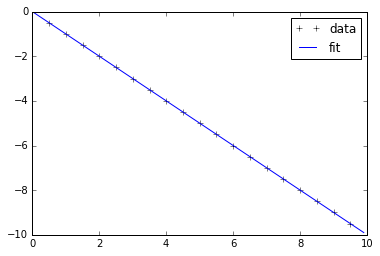

In [28]:
best_fit = [ f(x, slope, intercept) for x in time ]
plt.plot(time[::5], log_concentration[::5], "k+", label="data")
plt.plot(time, best_fit, "b", label="fit")
plt.legend()

# Step 9: Non-Linear Curve Fitting

fitted initial concentration: 1.0
fitted rate constant: 1.0


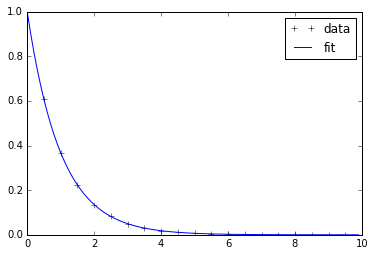

In [29]:
def f2(t, initial_concentration, k):
    return initial_concentration*np.exp(-k*t) 

popt, pcov = curve_fit(f2, time, concentration)
fitted_initial_concentration = popt[0]
fitted_k = popt[1]
print "fitted initial concentration:", fitted_initial_concentration
print "fitted rate constant:", fitted_k
best_fit2 = [ f2(t, fitted_initial_concentration, fitted_k) for t in time ]
plt.plot(time[::5], concentration[::5], "k+", label="data")
plt.plot(time, best_fit2, "b", label="fit")
plt.legend()

# Step 10: The Two Step System

In [36]:
k_1 = 10.0
k_minus1 = 100.0
k_2 = 0.1
A_initial = 1.0

In [37]:
from math import sqrt

p = k_1 + k_minus1 + k_2
q = sqrt(p**2 - 4*k_1*k_2)
lambda_2=(p+q)/2.0
lambda_3=(p-q)/2.0

In [38]:
c_1 = (k_1*A_initial)/(lambda_2-lambda_3)
c_2 = (lambda_2-k_2)/lambda_2
c_3 = (lambda_3-k_2)/lambda_3

In [39]:
def A(t):
    return c_1 * (c_2 * exp(-lambda_2*t) - c_3 * exp(-lambda_3*t))

def B(t):
    return c_1 * (exp(-lambda_3*t)-exp(-lambda_2*t))

In [40]:
time = np.arange(0.0,5.0,0.01)
conc_A = [ A(t) for t in time ]
conc_B = [ B(t) for t in time ]
conc_C = [ A_initial - conc_A[i] - conc_B[i] for i in range(len(time)) ]

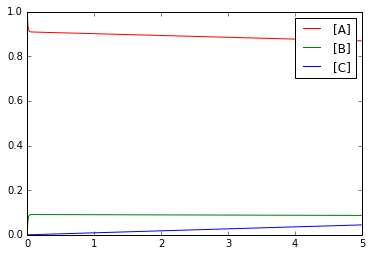

In [41]:
plt.plot(time, conc_A, "r", label="[A]")
plt.plot(time, conc_B, "g", label="[B]")
plt.plot(time, conc_C, "b", label="[C]")
plt.legend()

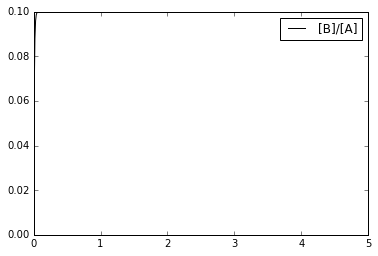

In [44]:
conc_ratio = [ conc_B[i] / conc_A[i] if conc_B[i] > 0.0 else 0.0\
              for i in range(len(time)) ]
#plt.ylim(0.0,0.015)
plt.plot(time, conc_ratio, "k", label="[B]/[A]")
plt.legend()

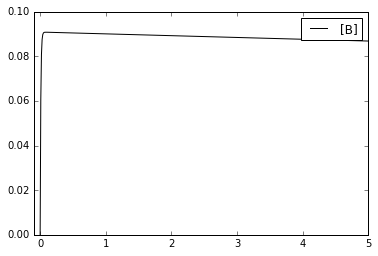

In [45]:
plt.plot(time, conc_B, "k", label="[B]")
plt.xlim(-0.1,5.0)
plt.legend()